In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

churn_data = pd.read_csv('data/churn.csv')
#churn_data.info()

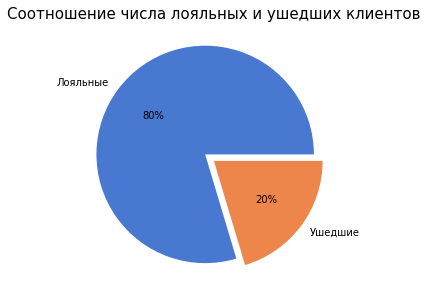

In [3]:
#9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
grouped_by_exit = churn_data.groupby(['Exited'])['RowNumber'].count()
#print(grouped_by_exit)

labels = ['Лояльные', 'Ушедшие']
colors = sns.color_palette('muted')[0:5]

plt.figure(figsize=(5,5), facecolor='white')
plt.title('Соотношение числа лояльных и ушедших клиентов', size = 15)
plt.pie(grouped_by_exit, explode = [0.1, 0], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


Один клиент из пяти прекращает сотрудничество с банком

In [18]:
#9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

filtered_by_balance = churn_data[churn_data['Balance'] > 2500]

fig = px.histogram(
    data_frame=filtered_by_balance, 
    x='Balance', #ось абсцисс
    height=500, #высота
    width=700, #ширина
    title='Распределение баланса клиентов с остатками на счетах более 2500 долл', #заголовок,
    nbins=25
)
fig.write_image('data/img1.png')
#fig.show()


![title](data/img1.png)

Наибольшее число клиентов банка имеют остатки на счетах между 100 и 150 тыс долл.
Количество счетов с остатками более 200 тыс долл или менее 10 тыс долл очень мало.

In [19]:
#9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

fig = px.histogram(
    data_frame=churn_data, 
    x='Balance', #ось абсцисс
    color='Exited',
    height=500, #высота
    width=700, #ширина
    histfunc='count',
    title='Распределение баланса клиентов: 1 - ушедших, 0 - лояльных', 
    nbins = 25
)
fig.write_image('data/img2.png')
#fig.show()


![title](data/img2.png)

Распределение балансов для ушедших клиентов (exited = 1) и лояльных (exited = 0) имеет одинаковый вид.
Видим большое количество счетов с нулевым балансом, в том числе среди действующих клиентов. В файле 10 тыс записей, из них третья часть (3.5 тыс) - нулевые остатки.

Для счетов с ненулевым балансом распределение имеет вид нормального, большая часть счетов имеет остатки от 100 до 150 тыс. Значений, близких к максимуму и минимуму, гораздо меньше, чем средних.

Я бы предложила банку пересмотреть условия для действующих клиентов (например процент, который начисляется на средний остаток по счёту за месяц), мотивировать их хранить деньги на счету, чтобы баланс всегда поддерживался выше нуля.

Также по виду распределения ненулевых остатков можно заметить, что клиенты уходят из банка независимо от того, какая сумма у них хранится на счёте. Возможно имеет смысл поработать с состоятельными клиентами, у которых остаток на счёте равен среднему и выше, чтобы удержать таких людей, предложить более выгодные условия.

In [34]:
#9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?
fig1 = px.histogram(
    data_frame=churn_data, 
    x='Age', #ось абсцисс
    color='Exited',
    height=500, #высота
    width=700, #ширина
    histfunc='count',
    title='Распределение возраста клиентов: 1 - ушедшие, 0 - лояльные', 
    nbins = 25
)
fig1.write_image('data/image3.png')
#fig1.show()

fig2 = px.box(
    data_frame=churn_data,
    x='Age', #ось абсцисс
    color='Exited',
    height=500, #высота
    width=700, #ширина
    title='Распределение возраста клиентов: 1 - ушедшие, 0 - лояльные', 
)
fig2.write_image('data/image4.png')
#fig2.show()

![title](data/image4.png)

Наибольшее количество лояльных клиентов имеет возраст 30-40 лет. Наибольшее количество ушедших - возраст 40-50 лет.
Я бы предложила банку поработать с условиями для людей, которые уходят чаще всего. 40-50 лет - обычно возраст, когда люди активно работают и приумножают свои накопления.
Много пожилых клиентов, остающихся с банком, вполне возможно, независимо от условий (коробчатая диаграмма показывает большое количество выбросов для красной фигуры).

In [27]:
#9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
#Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

fig = px.scatter(
    data_frame=churn_data,
    x='EstimatedSalary', 
    y='CreditScore',
    color='Exited',
    height=500, #высота
    width=700, #ширина
    title='Взаимосвязь кредитного рейтинга и предполагаемой зарплаты', 
)
fig.write_image('data/img5.png')
#fig.show()

![title](data/img5.png)

График выглядит хаотично и не показывает никаких зависимостей.
Мы видим, что человек с любой зарплатой в представленном диапазоне может иметь любой кредитный рейтинг, и это справедливо как для ушедших клиентов, так и для лояльных.

In [28]:
#9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
#Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited
#(так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

grouped_by_gender = churn_data.groupby(['Gender'])['Exited'].mean()
#print(grouped_by_gender)

fig = px.bar(
    data_frame=grouped_by_gender,
    x=grouped_by_gender.index,
    y='Exited',
    height=500, #высота
    width=700, #ширина
    title='Доли ушедших клиентов в разрезе пола'
)
fig.write_image('data/img6.png')
#fig.show()

![title](data/img6.png)

Клиенты - женщины чаще прекращают сотрудничество с банком, чем мужчины (25% женщин - клиентов имеют статус "ушедший" против 15% клиентов - мужчин).

In [29]:
#9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

churn_data['Loyal'] = 1 - churn_data['Exited']
grouped_by_exit = churn_data.groupby(['NumOfProducts'])[['Exited', 'Loyal']].sum()
#print(grouped_by_exit)

fig = px.bar(
    data_frame=grouped_by_exit,
    x=grouped_by_exit.index,
    y=['Exited', 'Loyal'],
    height=500, #высота
    width=700, #ширина
    title='Взаимосвязь оттока клиентов и числа приобретённых услуг'
)
fig.write_image('data/img7.png')
#fig.show()


![title](data/img7.png)

Подавляющее большинство ушедших клиентов имело только один вид приобретённых в банке услуг (1409 чел.)
Особенно заметна разница в количестве клиентов, приобретавших 1 или 2 услуги (1409 и 348 чел соответстенно). Далее отток клиентов снижается, но не так заметно.

При этом из клиентов, приобретавших 3 и более продукта, практически все прекратили сотрудничество с банком.

Наибольшее количество текущих клиентов имеет 2 доступных услуги.

In [30]:
#9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это.
#Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?
grouped = churn_data.groupby(['IsActiveMember'])['Exited', 'Loyal'].sum()

fig = px.bar(
    data_frame=grouped,
    x=grouped.index,
    y=['Exited', 'Loyal'],
    height=500, #высота
    width=700, #ширина
    title='Взаимосвязь статуса активности и оттока клиентов'
)
fig.write_image('data/img8.png')
#fig.show()

C:\Users\Dell\AppData\Local\Temp/ipykernel_5880/1912325058.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



![title](data/img8.png)

Среди неактивных клиентов (IsActiveMember = 0) отток клиентов выше, чем среди активных.
В связи с этим хочется предложить банку работать с неактивными клиентами. Стимулировать их пользоваться счетами (если статус "неактивный" означает то, что человек не пользовался счётом какое-то время) и поддерживать баланс на счёте выше нуля. Как вариант можно продумать программы начисления кэшбека за покупки и процента на остаток по счёту.

In [31]:
#9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира.
#Предположите, с чем это может быть связано.

#Сгруппируем данные по странам и рассчитаем среднее значение по полю Exited, это и будет доля ушедших клиентов
choropleth_data = churn_data.groupby(['Geography'])['Exited'].mean()
#print(choropleth_data)

fig = px.choropleth(
    data_frame=choropleth_data, 
    locations=choropleth_data.index, 
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 1], #диапазон цвета, доли находятся в интервале от 0 до 1
    title='Доля ушедщих клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)
fig.write_image('data/img9.png')
#fig.show()

![title](data/img9.png)

Больше всего клиентов прекратило сотрудничество с банком в Германии.
Доля ушедших клиентов составляет более 32 процентов.

In [203]:
#9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже.
#Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)


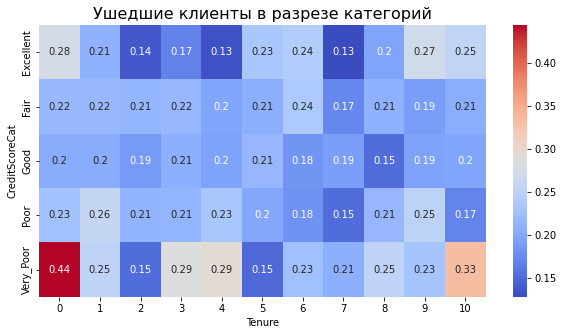

In [207]:
#Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure).
#В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
pivot = churn_data.pivot_table(values ='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean')

#На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

plt.figure(figsize=(10,5))
heatmap = sns.heatmap(data=pivot, cmap='coolwarm', annot=True)
heatmap.set_title('Ушедшие клиенты в разрезе категорий', fontsize=16);

Наиболее высокие доли оттока клиентов наблюдаются в категории Very Poor
(44 процента для тех, кто пользовался услугами банка менее года, и 33 процента для тех, кто с банком около 10 лет)

В категории с наивысшим кредитным рейтингом Excellent 28 процентов клиентов, пользовавшихся услугами банка до года, прекратило сотрудничество с банком.